In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

def func(x, a, b, c, d):
    return a + b * x + c * x ** 2 + d * x ** 3

# x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
# y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

# pmodel = Model(func)
# params = pmodel.make_params(a=1, b=2, c=1, d=1)

# params['b'].vary = False 

# result = pmodel.fit(y, params, x=x)

# print(result.fit_report())

# xnew = np.linspace(x[0], x[-1], 1000)
# ynew = result.eval(x=xnew)

# plt.plot(x, y, 'bo')
# plt.plot(x, result.best_fit, 'k-')
# plt.plot(xnew, ynew, 'r-')
# plt.show()

In [3]:
WIDTH = 7
HEIGHT = 3.5
YLIMS = [-8,8]
X_AXIS = 'Displacement Amplitude ($\AA$)'
Y_AXIS = '$\Delta$E (meV/atom)'
LABEL_FONT = 17

Index(['kpoint', 'disp', 'total_energy', 'drift_x', 'drift_y', 'drift_z',
       'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot'],
      dtype='object')
-571.36189517


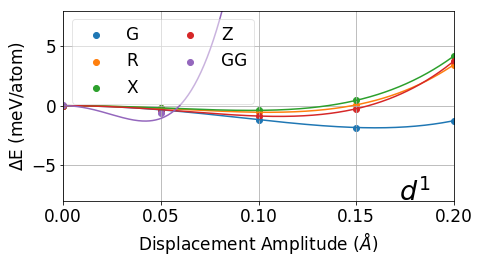

In [4]:
### Extracting data

infile = "../../mod-path/stats-d1.txt"

df = pd.read_table(infile)
# df['doping'] = doping_levels_num
print(df.keys())

# Make GG uniform from diff. unit cell size
df['total_energy'] = df.apply(lambda x: x.total_energy*4 if x.kpoint == 'GG' else x.total_energy, 1)
    
df['de'] = (df['total_energy']-df['total_energy'][0])*1000/72
df['disp'] = df['disp']*0.01


print(df['total_energy'][0])
### Energy per kpoint over displacement ###

XLIMS = [0,0.2]

fig = plt.figure(figsize=(WIDTH,HEIGHT))

for kpt in ['G', 'R', 'X', 'Z', 'GG']:
    sub_df = df[df.kpoint == kpt]
    x = sub_df['disp']
    y = sub_df['de']
    plt.scatter(x, y, label=kpt)
        
    # Fitting to Landau model
    def landau(x, a, b, c):
        return a*x**2 + b*x**4 + c*x**6
    
    pmodel = Model(landau)
    params = pmodel.make_params(a=-1,b=1, c=1)
    result = pmodel.fit(y, params, x=x)
    #print(result.fit_report())
    
    x2 = np.linspace(x.min(), x.max(), 500)
    y2 = result.eval(x=x2)
    
#     pv = np.polyfit(x, y, 3)
#     fit = np.poly1d(pv)
#     y2 = fit(x2)
#     f = interp1d(x, y, kind='quadratic')
#     y2 = f(x2)
    plt.plot(x2, y2)
    
    


# Chance font size
plt.gca().xaxis.label.set_fontsize(LABEL_FONT)
plt.gca().yaxis.label.set_fontsize(LABEL_FONT)
plt.gca().tick_params(labelsize=LABEL_FONT)
# plt.gca().get_yticklabels().fontsize(LABEL_FONT)

plt.grid(True)
plt.xlabel(X_AXIS)
plt.ylabel(Y_AXIS)
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.legend(fancybox=True, ncol=2, framealpha=0.5, fontsize=LABEL_FONT) 
plt.text(0.9, 0.12, "$d^{1}$", horizontalalignment='center', verticalalignment='top',\
         transform=plt.gca().transAxes,fontsize=LABEL_FONT+10)

plt.show()

## Saving plot
fig.savefig('mod-path-d1' + '.png', bbox_inches='tight', dpi=500)
fig.savefig('mod-path-d1-vec' + '.pdf', bbox_inches='tight')

In [5]:
df

,kpoint,disp,total_energy,drift_x,drift_y,drift_z,volume,mag_s,mag_p,mag_d,mag_tot,de
0,G,0.00,-571.361895,0.000000,0.000000,0.0,994.10,-0.0,-0.0,0.0,-0.0,0.000000
1,G,0.05,-571.386875,-0.000244,0.000000,0.0,994.10,-0.0,-0.0,0.0,-0.0,-0.346946
2,G,0.10,-571.446425,-0.000550,0.000000,-0.0,994.10,-0.0,-0.0,0.0,-0.0,-1.174029
3,G,0.15,-571.494100,-0.000659,0.000000,0.0,994.10,-0.0,-0.0,0.0,-0.0,-1.836179
4,G,0.20,-571.452897,-0.000608,0.000001,-0.0,994.10,-0.0,-0.0,0.0,-0.0,-1.263920
5,R,0.00,-571.361895,0.000000,0.000000,0.0,994.10,-0.0,-0.0,0.0,-0.0,0.000000
6,R,0.05,-571.378041,0.000000,0.000000,0.0,994.10,-0.0,-0.0,0.0,-0.0,-0.224251
7,R,0.10,-571.401705,0.000000,0.000000,-0.0,994.10,-0.0,-0.0,0.0,-0.0,-0.552913
8,R,0.15,-571.357081,0.000000,0.000000,-0.0,994.10,-0.0,-0.0,0.0,-0.0,0.066857
9,R,0.20,-571.114113,0.000000,-0.000000,0.0,994.10,-0.0,-0.0,0.0,-0.0,3.441423


Index(['kpoint', 'disp', 'total_energy', 'drift_x', 'drift_y', 'drift_z',
       'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot'],
      dtype='object')


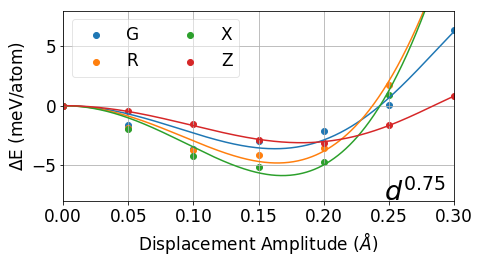

In [29]:
### Extracting data

infile = "../../mod-path/stats-d075.txt"

df = pd.read_table(infile)
# df['doping'] = doping_levels_num
print(df.keys())
df['de'] = (df['total_energy']-df['total_energy'][0])*1000/72
df['disp'] = df['disp']*0.01
# df


### Energy per kpoint over displacement ###
# WIDTH = 7
# HEIGHT = 3.5
# YLIMS = [-6,6]
XLIMS = [0,0.3]
# X_AXIS = 'Displacement Amplitude ($\AA$)'
# Y_AXIS = '$\Delta$E (meV/atom)'
# LABEL_FONT = 17

fig = plt.figure(figsize=(WIDTH,HEIGHT))


for kpt in 'GRXZ':
    sub_df = df[df.kpoint == kpt]
    x = sub_df['disp']
    y = sub_df['de']
    plt.scatter(x, y, label=kpt)
        
    # Fitting to Landau model
    def landau(x, a, b,c):
        return a*x**2 + b*x**4 + c*x**6
    
    pmodel = Model(landau)
    params = pmodel.make_params(a=-1,b=1,c=1)
    result = pmodel.fit(y, params, x=x)
#     print(result.fit_report())
    
    x2 = np.linspace(x.min(), x.max(), 500)
    y2 = result.eval(x=x2)
    
#     pv = np.polyfit(x, y, 3)
#     fit = np.poly1d(pv)
#     y2 = fit(x2)
#     f = interp1d(x, y, kind='quadratic')
#     y2 = f(x2)
    plt.plot(x2, y2)


# Chance font size
plt.gca().xaxis.label.set_fontsize(LABEL_FONT)
plt.gca().yaxis.label.set_fontsize(LABEL_FONT)
plt.gca().tick_params(labelsize=LABEL_FONT)
# plt.gca().get_yticklabels().fontsize(LABEL_FONT)

plt.grid(True)
plt.xlabel(X_AXIS)
plt.ylabel(Y_AXIS)
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.legend(fancybox=True, ncol=2, framealpha=0.5, fontsize=LABEL_FONT) 
plt.text(0.9, 0.12, "$d^{0.75}$", horizontalalignment='center', verticalalignment='top',\
         transform=plt.gca().transAxes,fontsize=LABEL_FONT+10)

plt.show()

## Saving plot
fig.savefig('mod-path-d075' + '.png', bbox_inches='tight', dpi=500)
fig.savefig('mod-path-d075-vec' + '.pdf', bbox_inches='tight')

Index(['kpoint', 'disp', 'total_energy', 'drift_x', 'drift_y', 'drift_z',
       'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot'],
      dtype='object')


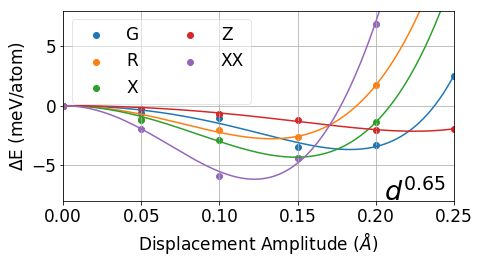

In [30]:
### Extracting data

infile = "../../mod-path/stats-d065.tsv"

df = pd.read_table(infile)
# df['doping'] = doping_levels_num
print(df.keys())
df['de'] = (df['total_energy']-df['total_energy'][0])*1000/72
df['disp'] = df['disp']*0.01
# df


### Energy per kpoint over displacement ###
# WIDTH = 7
# HEIGHT = 3.5
# YLIMS = [-8,8]
XLIMS = [0,0.25]
# X_AXIS = 'Displacement Amplitude ($\AA$)'
# Y_AXIS = 'Energy (eV/atom)'
# LABEL_FONT = 17

fig = plt.figure(figsize=(WIDTH,HEIGHT))


for kpt in ['G', 'R', 'X', 'Z', 'XX']:

    sub_df = df[(df.kpoint == kpt) & (df['disp'] != .3)]
#     print(sub_df)
    x = sub_df['disp']
    y = sub_df['de']
    plt.scatter(x, y, label=kpt)
        
    # Fitting to Landau model
    def landau(x, a, b,c):
        return a*x**2 + b*x**4 + c*x**6
    
    pmodel = Model(landau)
    params = pmodel.make_params(a=-1,b=1,c=1)
    result = pmodel.fit(y, params, x=x)
    #print(result.fit_report())
    
    x2 = np.linspace(x.min(), x.max(), 500)
    y2 = result.eval(x=x2)
    
#     pv = np.polyfit(x, y, 3)
#     fit = np.poly1d(pv)
#     y2 = fit(x2)
#     f = interp1d(x, y, kind='quadratic')
#     y2 = f(x2)
    plt.plot(x2, y2)

# Chance font size
plt.gca().xaxis.label.set_fontsize(LABEL_FONT)
plt.gca().yaxis.label.set_fontsize(LABEL_FONT)
plt.gca().tick_params(labelsize=LABEL_FONT)
# plt.gca().get_yticklabels().fontsize(LABEL_FONT)

plt.grid(True)
plt.xlabel(X_AXIS)
plt.ylabel(Y_AXIS)
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.legend(fancybox=True, ncol=2, framealpha=0.5, fontsize=LABEL_FONT) 

plt.text(0.9, 0.12, "$d^{0.65}$", horizontalalignment='center', verticalalignment='top',\
         transform=plt.gca().transAxes,fontsize=LABEL_FONT+10)

plt.show()

## Saving plot
fig.savefig('mod-path-d065' + '.png', bbox_inches='tight', dpi=500)
fig.savefig('mod-path-d065-vec' + '.pdf', bbox_inches='tight')